In [1]:
import autogluon 
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
data_url = 'dataset/'
train_data = TabularDataset(f'{data_url}train.csv')
print(train_data.head())

        ID  flow_duration  Header_Length  Protocol type  Duration       Rate  \
0   769866       0.000000          54.00           6.00     64.00   2.890680   
1  1859874       0.000892          54.58            NaN     64.00  28.594443   
2   396092       0.000000           0.00           1.00     64.00  23.716061   
3   179708     109.146727        1992.80           8.20     50.10  41.102103   
4  1527289       0.025221          58.53           5.95     65.91  25.300629   

       Srate  Drate  fin_flag_number  syn_flag_number  ...         Std  \
0   2.890680    0.0              0.0              0.0  ...         NaN   
1  28.594443    0.0              0.0              1.0  ...    0.000000   
2  23.716061    0.0              0.0              0.0  ...         NaN   
3  41.102103    0.0              0.0              0.0  ...  305.527954   
4  25.300629    NaN              1.0              0.0  ...    1.158718   

   Tot size           IAT  Number   Magnitue      Radius    Covariance  \


In [3]:
label = 'Label'
train_data[label].describe()

count              1950138
unique                  34
top       MITM-ArpSpoofing
freq                 84260
Name: Label, dtype: object

In [4]:
train_data[label].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1950138 entries, 0 to 1950137
Series name: Label
Non-Null Count    Dtype 
--------------    ----- 
1950138 non-null  object
dtypes: object(1)
memory usage: 14.9+ MB


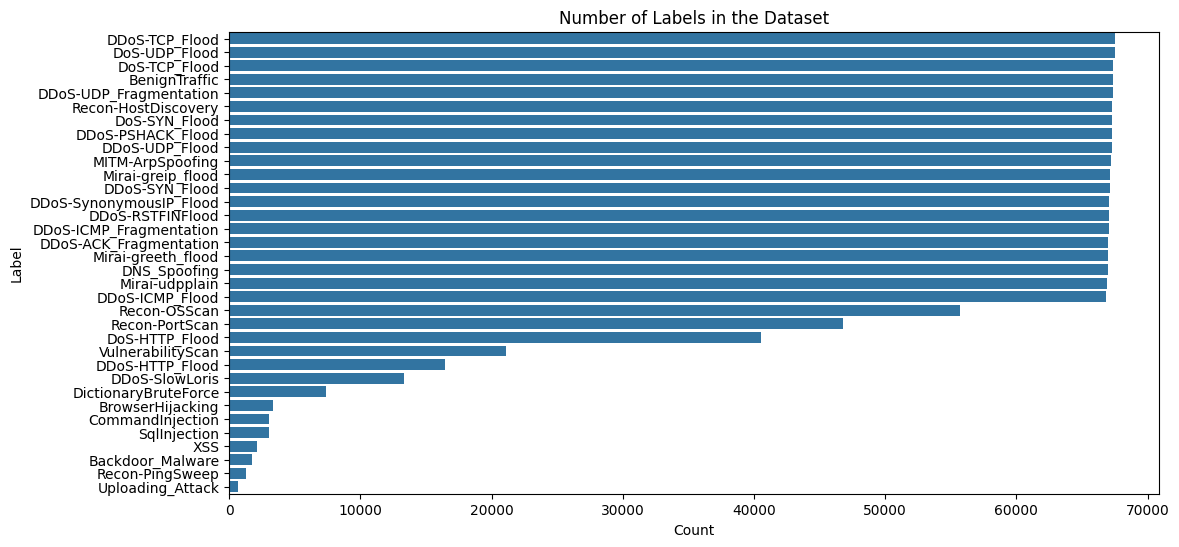

In [13]:
# Plotting the number of labels
plt.figure(figsize=(12, 6))
sns.countplot(y='Label', data=train_data, order=train_data[label].value_counts().index)
plt.title('Number of Labels in the Dataset')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [5]:
# Define the label column
label = 'Label'

# Ensure no NaN values in the label column (if applicable)
train_data[label].fillna('Unknown', inplace=True)

C:\Users\vbaonguyen\AppData\Local\Temp\ipykernel_6600\878115906.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[label].fillna('Unknown', inplace=True)


In [6]:
# Split data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [7]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')
hyperparameters = {
 'NN_TORCH': [{'ag_args_fit': {'num_gpus': 1}}],
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 3,
   'ag_args': {'name_suffix': 'Large',
   'priority': 0,
   'hyperparameter_tune_kwargs': None},
   'ag_args_fit': {'num_gpus': 1} # Train with GPU. This amount needs to be <= total num_gpus granted to TabularPredictor
  }],
 'CAT': {},
 'XGB': {},
 'FASTAI': [{'ag_args_fit': {'num_gpus': 1}}],
 'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
 'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}
hyperparameters

{'NN_TORCH': [{'ag_args_fit': {'num_gpus': 1}}],
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 3,
   'ag_args': {'name_suffix': 'Large',
    'priority': 0,
    'hyperparameter_tune_kwargs': None},
   'ag_args_fit': {'num_gpus': 1}}],
 'CAT': {},
 'XGB': {},
 'FASTAI': [{'ag_args_fit': {'num_gpus': 1}}],
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'mu

In [8]:
# Train AutoGluon Predictor with validation data
predictor = TabularPredictor(label=label, eval_metric='accuracy').fit(
    train_data, 
    tuning_data=val_data,
    num_gpus=1,
    ag_args_fit={"ag.max_memory_usage_ratio": 1.39},
    hyperparameters=hyperparameters,
)

No path specified. Models will be saved in: "AutogluonModels\ag-20241205_133759"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       51.46 GB / 63.72 GB (80.8%)
Disk Space Avail:   94.47 GB / 476.31 GB (19.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial pr

In [9]:
# Display predictor summary
predictor = TabularPredictor.load("AutogluonModels/ag-20241205_133759")
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.942084,accuracy,470.666454,4286.166973,0.073316,48.840572,2,True,14
1,XGBoost,0.940958,accuracy,13.679610,2243.746387,13.679610,2243.746387,1,True,11
2,RandomForestEntr,0.927531,accuracy,7.322455,469.626643,7.322455,469.626643,1,True,7
3,CatBoost,0.927221,accuracy,1.890738,901.579781,1.890738,901.579781,1,True,8
4,RandomForestGini,0.922231,accuracy,7.370026,257.310988,7.370026,257.310988,1,True,6
5,LightGBMXT,0.908260,accuracy,6.880813,118.291059,6.880813,118.291059,1,True,5
6,LightGBMLarge,0.873678,accuracy,6.713603,130.915911,6.713603,130.915911,1,True,13
7,KNeighborsDist,0.818826,accuracy,433.396289,1.834810,433.396289,1.834810,1,True,2
8,NeuralNetTorch,0.814736,accuracy,2.111156,1133.891662,2.111156,1133.891662,1,True,12
9,KNeighborsUnif,0.809493,accuracy,476.851776,5.729049,476.851776,5.729049,1,True,1


In [10]:
predictor.leaderboard(val_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.942084,0.942084,accuracy,738.306436,470.666454,4286.166973,0.581941,0.073316,48.840572,2,True,14
1,XGBoost,0.940958,0.940958,accuracy,294.217415,13.679610,2243.746387,294.217415,13.679610,2243.746387,1,True,11
2,RandomForestEntr,0.927531,0.927531,accuracy,9.177741,7.322455,469.626643,9.177741,7.322455,469.626643,1,True,7
3,CatBoost,0.927221,0.927221,accuracy,2.802573,1.890738,901.579781,2.802573,1.890738,901.579781,1,True,8
4,RandomForestGini,0.922231,0.922231,accuracy,8.793489,7.370026,257.310988,8.793489,7.370026,257.310988,1,True,6
5,LightGBMXT,0.908260,0.908260,accuracy,6.956881,6.880813,118.291059,6.956881,6.880813,118.291059,1,True,5
6,LightGBMLarge,0.873678,0.873678,accuracy,6.801161,6.713603,130.915911,6.801161,6.713603,130.915911,1,True,13
7,KNeighborsDist,0.818826,0.818826,accuracy,416.165279,433.396289,1.834810,416.165279,433.396289,1.834810,1,True,2
8,NeuralNetTorch,0.814736,0.814736,accuracy,2.569411,2.111156,1133.891662,2.569411,2.111156,1133.891662,1,True,12
9,KNeighborsUnif,0.809493,0.809493,accuracy,417.570159,476.851776,5.729049,417.570159,476.851776,5.729049,1,True,1


In [11]:
predictor.evaluate(val_data, silent=True)
#predictor.model_best

{'accuracy': 0.9420836452767494,
 'balanced_accuracy': 0.7989565236596786,
 'mcc': 0.939668783139208}

In [12]:
#data_url = 'dataset/'
predictor = TabularPredictor.load("AutogluonModels/ag-20241205_133759")
y_pred = predictor.predict(val_data.drop(columns=[label]))
y_pred = predictor.predict(val_data)
y_pred.head(10)

1124166             DDoS-SYN_Flood
825371               DoS-UDP_Flood
1591214             Mirai-udpplain
955470         Recon-HostDiscovery
459002     DDoS-ICMP_Fragmentation
347201      DDoS-ACK_Fragmentation
1163786     DDoS-ACK_Fragmentation
155626              DDoS-SYN_Flood
1012042    DDoS-ICMP_Fragmentation
380261              DoS-HTTP_Flood
Name: Label, dtype: object

In [15]:
data_url = 'dataset/'
test_data = TabularDataset(f'{data_url}test.csv')
predictor = TabularPredictor.load("AutogluonModels/ag-20241205_133759")
y_pred = predictor.predict(test_data)
#y_pred = predictor.predict(test_data, model='XGBoost')
y_pred.head(10)

Loaded data from: dataset/test.csv | Columns = 47 / 47 | Rows = 835774 -> 835774


0           CommandInjection
1     DDoS-ACK_Fragmentation
2               DNS_Spoofing
3               DNS_Spoofing
4               DNS_Spoofing
5         Mirai-greeth_flood
6     DDoS-ACK_Fragmentation
7              DoS-TCP_Flood
8    DDoS-ICMP_Fragmentation
9           DDoS-RSTFINFlood
Name: Label, dtype: object

In [17]:
import os

print(os.getcwd())
print(os.system("pwd"))

C:\Users\vbaonguyen\Documents\python3.10.11-1
0


In [18]:
import subprocess

result = subprocess.run(['pwd',], capture_output=True)
# Returns the current directory as a string for processing in result.stdout on Mac/Linux but raises an exception on Windows
print(result.stdout)

b'/c/Users/vbaonguyen/Documents/python3.10.11-1\n'
